In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
marvel = pd.read_csv('../ML/comics-characters/marvel-wikia-data.csv')
dc = pd.read_csv('../ML/comics-characters/dc-wikia-data.csv')

In [3]:
marvel.drop(columns=['page_id','ID','urlslug','GSM','FIRST APPEARANCE'], inplace=True)
dc.drop(columns=['page_id','ID','urlslug','GSM','FIRST APPEARANCE'], inplace=True)

In [4]:
marvel.dropna(subset=['EYE', 'HAIR', 'Year'], inplace=True)
dc.dropna(subset=['EYE', 'HAIR', 'YEAR'], inplace=True)
dc = dc[dc.APPEARANCES>= 50]
marvel = marvel[marvel.APPEARANCES>= 50]

In [5]:
marvel.ALIGN.fillna(value = "Neutral Characters", inplace=True)
dc.ALIGN.fillna(value = "Neutral Characters", inplace=True)

In [6]:
marvelEyes = marvel.EYE.value_counts()
dcEyes = dc.EYE.value_counts()
marvelEyeTrim = []
dcEyeTrim = []
for i in marvel.EYE.values:
    if marvelEyes[i] < 10:
        marvelEyeTrim.append('RareColour/NoInfo')
    else:
        marvelEyeTrim.append(i)
for i in dc.EYE.values:
    if dcEyes[i] < 10:
        dcEyeTrim.append('RareColour/NoInfo')
    else:
        dcEyeTrim.append(i)
marvel['EYE'] = marvelEyeTrim
dc['EYE'] = dcEyeTrim

In [7]:
marvelHair = marvel.HAIR.value_counts()
dcHair = dc.HAIR.value_counts()
marvelHairTrim = []
dcHairTrim = []
for i in marvel.HAIR.values:
    if marvelHair[i] < 10:
        marvelHairTrim.append('RareColour/NoInfo')
    else:
        marvelHairTrim.append(i)
for i in dc.HAIR.values:
    if dcHair[i] < 10:
        dcHairTrim.append('RareColor/NoInfo')
    else:
        dcHairTrim.append(i)
marvel['HAIR'] = marvelHairTrim
dc['HAIR'] = dcHairTrim


In [8]:
marvel = marvel[marvel.SEX.isin(["Male Characters", "Female Characters"])]
dc = dc[dc.SEX.isin(["Male Characters", "Female Characters"])]
dc = dc[dc.ALIGN.isin(["Good Characters", "Bad Characters", "Neutral Characters"])]

Text(0.5,1,'Marvel')

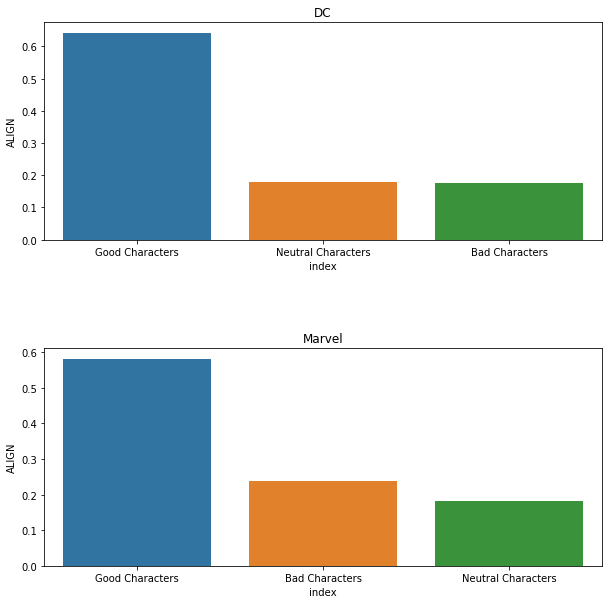

In [9]:
dcAlign = dc.ALIGN.value_counts(normalize=True).reset_index()
marvelAlign = marvel.ALIGN.value_counts(normalize=True).reset_index()
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.subplots_adjust(hspace=0.5)

sns.barplot(x='index', y='ALIGN', data = dcAlign, ax=ax1).set_title('DC')
sns.barplot(x='index', y='ALIGN', data = marvelAlign, ax = ax2).set_title('Marvel')

Text(0.5,1,'Marvel')

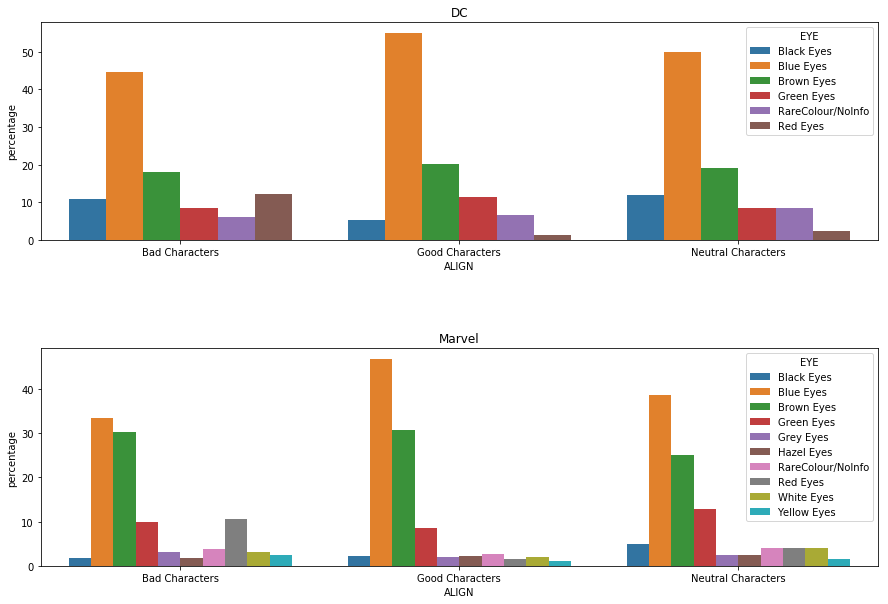

In [10]:
dcAlignEyes = dc.groupby(['ALIGN', 'EYE']).count().name.reset_index()
dcAlignEyes = dcAlignEyes.groupby(['ALIGN', 'EYE']).sum().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
#groupby(level=0) для того чтобы строить процентное распределение в каждой из 3х подгрупп, а не для всех
marvelAlignEyes = marvel.groupby(['ALIGN', 'EYE']).count().name.reset_index()
marvelAlignEyes = marvelAlignEyes.groupby(['ALIGN', 'EYE']).sum().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
dcAlignEyes.rename(columns={'name':'percentage'}, inplace=True)
marvelAlignEyes.rename(columns={'name':'percentage'}, inplace=True)
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.subplots_adjust(hspace=0.5)

sns.barplot(x='ALIGN', y='percentage', hue='EYE', data = dcAlignEyes, ax=ax1).set_title('DC')
sns.barplot(x='ALIGN', y='percentage', hue='EYE', data = marvelAlignEyes, ax = ax2).set_title('Marvel')

Text(0.5,1,'Marvel')

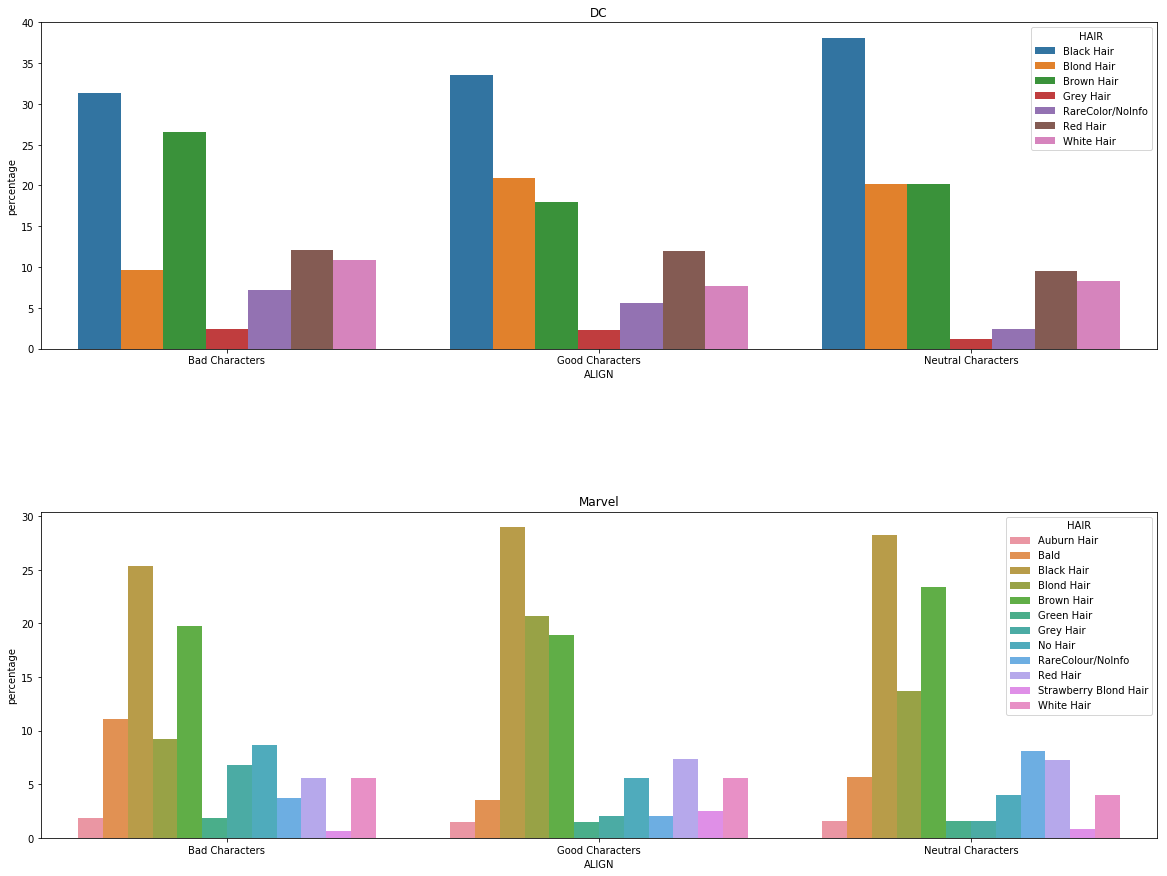

In [11]:
dcAlignHair = dc.groupby(['ALIGN', 'HAIR']).count().name.reset_index()
dcAlignHair = dcAlignHair.groupby(['ALIGN', 'HAIR']).sum().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
#groupby(level=0) для того чтобы строить процентное распределение в каждой из 3х подгрупп, а не для всех
marvelAlignHair = marvel.groupby(['ALIGN', 'HAIR']).count().name.reset_index()
marvelAlignHair = marvelAlignHair.groupby(['ALIGN', 'HAIR']).sum().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
dcAlignHair.rename(columns={'name':'percentage'}, inplace=True)
marvelAlignHair.rename(columns={'name':'percentage'}, inplace=True)
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.subplots_adjust(hspace=0.5)

sns.barplot(x='ALIGN', y='percentage', hue='HAIR', data = dcAlignHair, ax=ax1).set_title('DC')
sns.barplot(x='ALIGN', y='percentage', hue='HAIR', data = marvelAlignHair, ax = ax2).set_title('Marvel')

Text(0.5,1,'Marvel')

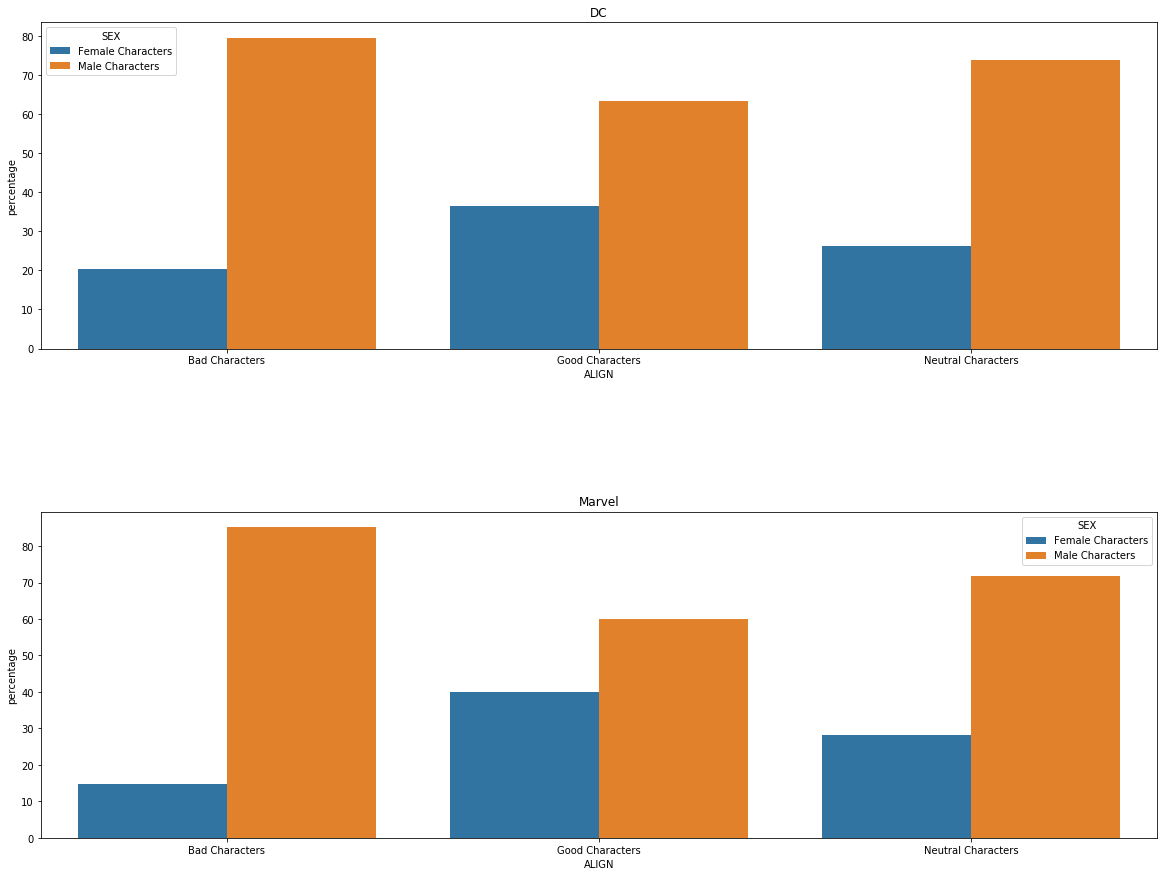

In [12]:
dcAlignSex = dc.groupby(['ALIGN', 'SEX']).count().name.reset_index()
dcAlignSex = dcAlignSex.groupby(['ALIGN', 'SEX']).sum().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
#groupby(level=0) для того чтобы строить процентное распределение в каждой из 3х подгрупп, а не для всех
marvelAlignSex = marvel.groupby(['ALIGN', 'SEX']).count().name.reset_index()
marvelAlignSex = marvelAlignSex.groupby(['ALIGN', 'SEX']).sum().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
dcAlignSex.rename(columns={'name':'percentage'}, inplace=True)
marvelAlignSex.rename(columns={'name':'percentage'}, inplace=True)
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.subplots_adjust(hspace=0.5)

sns.barplot(x='ALIGN', y='percentage', hue='SEX', data = dcAlignSex, ax=ax1).set_title('DC')
sns.barplot(x='ALIGN', y='percentage', hue='SEX', data = marvelAlignSex, ax = ax2).set_title('Marvel')